In [1]:
import pandas as pd
import numpy as np

from google.colab import files

In [2]:
!pip install -q kaggle

In [3]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d osmi/mental-health-in-tech-survey

  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 26.4MB/s]


In [6]:
!unzip -q /content/mental-health-in-tech-survey.zip -d .

In [7]:
df = pd.read_csv('/content/survey.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
df.shape

(1259, 27)

In [10]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [11]:
df = df.drop(columns = ['state', 'comments'])

In [12]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [13]:
print(df.work_interfere.value_counts())

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


In [14]:
# fill in the missing value in the work_interfere column with 'Sometimes' -- appears more often according to the results above

df['work_interfere'] = df['work_interfere'].fillna('Sometimes')
df[df.isna().any(axis=1)]

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,2014-08-27 11:31:22,33,Male,United States,NaN,Yes,No,Sometimes,6-25,No,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,2014-08-27 11:31:50,35,Female,United States,NaN,Yes,Yes,Sometimes,1-5,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,2014-08-27 11:32:05,39,M,Canada,NaN,No,No,Never,1-5,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
8,2014-08-27 11:32:39,42,Female,United States,NaN,Yes,Yes,Sometimes,100-500,No,...,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,2014-08-27 11:32:43,23,Male,Canada,NaN,No,No,Never,26-100,No,...,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [15]:
df.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [16]:
print(df.self_employed.value_counts())

No     1095
Yes     146
Name: self_employed, dtype: int64


In [17]:
# fill in the missing value in the self_employed column with 'No' -- appears more often according to the results above

df['self_employed'] = df['self_employed'].fillna('No')
df[df.isna().any(axis=1)]

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence


In [18]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [19]:
df.Gender.unique()

print(df.Gender.value_counts())

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [20]:
female = ['female', 'f', 'woman', 'female (trans)', 'trans woman', 'female (cis)', 'cis-female/femme', 'femail', 'trans-female', 'cis female', 'queer/she/they', 'femake', 'androgyne']

def new_gender(row):
  gender = row["Gender"].lower()
  if gender in female or "fe" in gender:
    return "Female"
  
  return "Male"

In [21]:
df.Gender = df.apply(lambda row: new_gender(row), axis=1)

In [22]:
df.Gender.unique()

print(df.Gender.value_counts())

Male      1006
Female     253
Name: Gender, dtype: int64


In [23]:
df.Age.unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [24]:
df['Age'].replace([df['Age'][df['Age'] < 15]], np.nan, inplace = True)
df['Age'].replace([df['Age'][df['Age'] > 65]], np.nan, inplace = True)

df['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., nan, 43., 56., 60., 54., 55., 48., 20., 57., 58., 47.,
       62., 51., 65., 49., 53., 61.])

In [25]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)
df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.0,Female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44.0,Male,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32.0,Male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31.0,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [26]:
df['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., 43., 56., 60., 54., 55., 48., 20., 57., 58., 47., 62.,
       51., 65., 49., 53., 61.])

In [27]:
df['Age'] = df['Age'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [29]:
df.Country.unique()

print(df.Country.value_counts())

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [30]:
df = df.drop(columns = ['Timestamp', 'Country'])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# Exploratory Data Analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Categorical Features

In [32]:
categorical_features = ['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'phys_health_interview','mental_health_interview', 'mental_vs_physical','obs_consequence']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


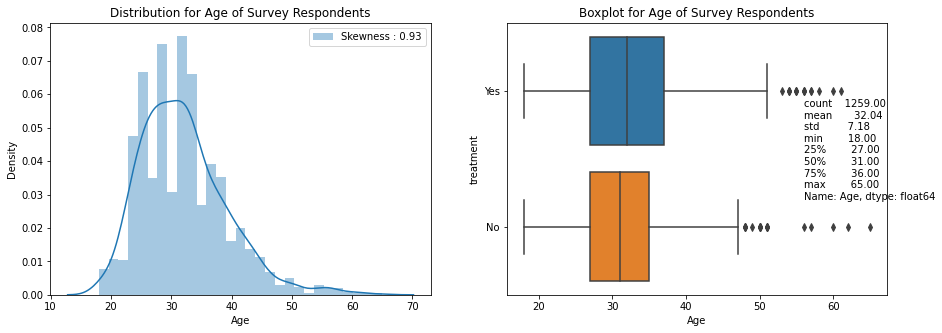

In [37]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'], label = 'Skewness : %.2f'%(df['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "treatment", data = df)
plt.title('Boxplot for Age of Survey Respondents')
age = str(df['Age'].describe().round(2))
plt.text(56, 0.80, age)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


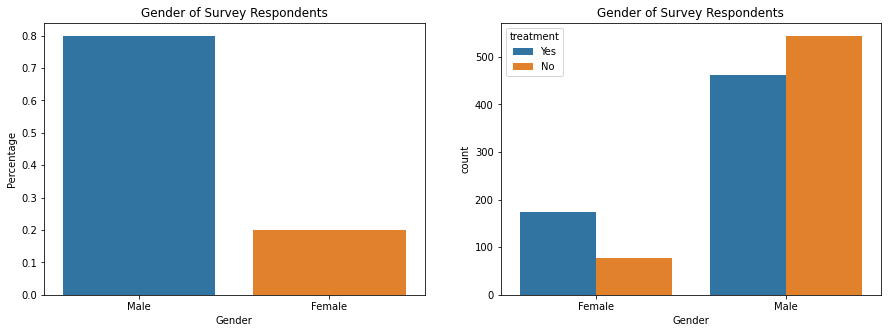

In [36]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
eda_percentage = df['Gender'].value_counts(normalize = True).rename_axis('Gender').reset_index(name = 'Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Gender of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['treatment'])
plt.title('Gender of Survey Respondents')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


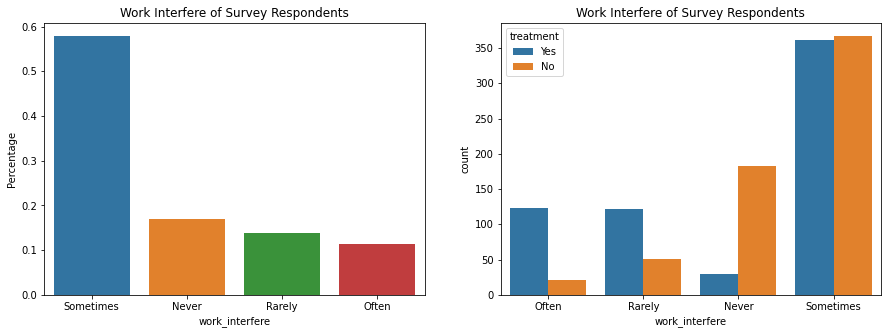

In [40]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Work Interfere of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(df['work_interfere'], hue = df['treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


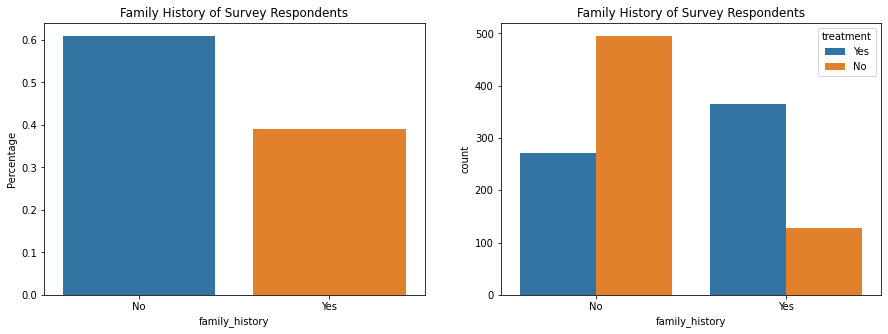

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
eda_percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Family History of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'])
plt.title('Family History of Survey Respondents')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


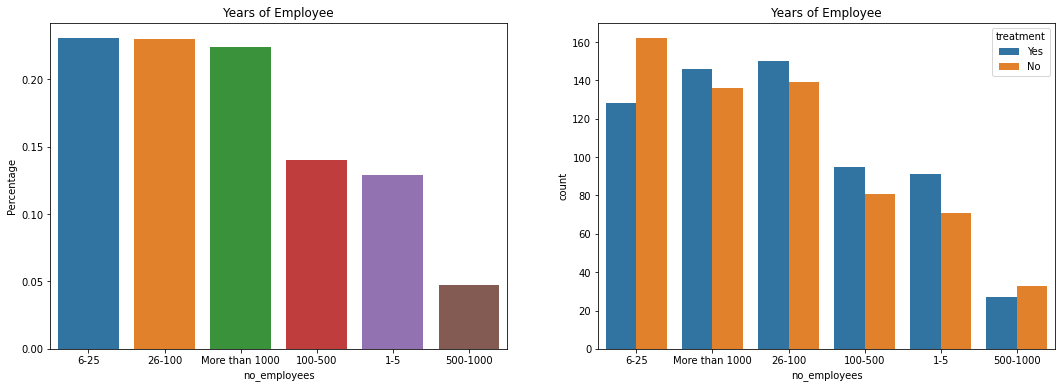

In [43]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
eda_percentage = df['no_employees'].value_counts(normalize = True).rename_axis('no_employees').reset_index(name = 'Percentage')
sns.barplot(x = 'no_employees', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Years of Employee')
plt.subplot(1,2,2)
sns.countplot(df['no_employees'], hue = df['treatment'])
plt.title('Years of Employee')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


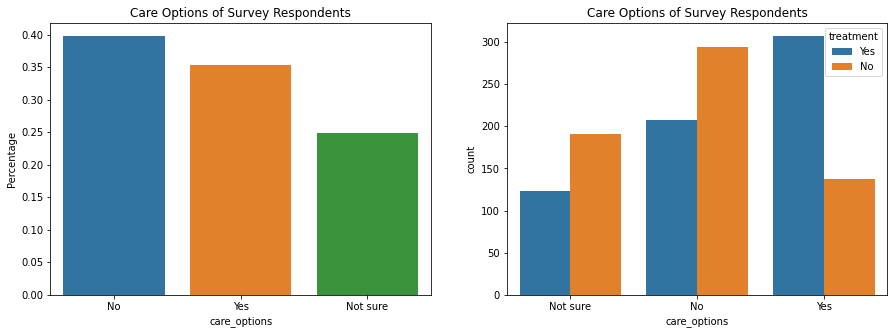

In [45]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
eda_percentage = df['care_options'].value_counts(normalize = True).rename_axis('care_options').reset_index(name = 'Percentage')
sns.barplot(x = 'care_options', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Care Options of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(df['care_options'], hue = df['treatment'])
plt.title('Care Options of Survey Respondents')
plt.show()

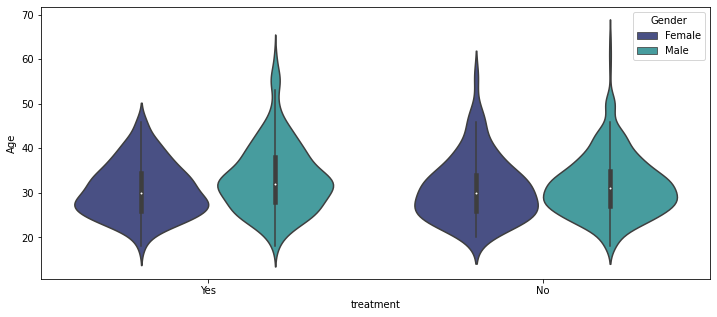

In [46]:
plt.figure(figsize=(12,5))
sns.violinplot(x = 'treatment', y='Age', hue='Gender', data = df, palette = 'mako')
plt.show()

# Data Preparation

#### One hot encoding to all categorical features

In [47]:
for col in categorical_features:
  df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)

In [48]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_health_interview_No,mental_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,...,0,0,1,0,0,1,0,0,1,0
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,...,0,0,0,1,0,1,0,0,0,0
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,...,1,0,1,0,1,0,1,1,0,0
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,...,0,0,0,0,0,0,0,1,0,1
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,...,0,0,1,0,1,0,1,0,0,0


In [49]:
df['treatment'] = np.where(df['treatment'] == 'Yes', 1, 0)

In [50]:
df.drop(categorical_features, axis = 1, inplace = True)
df.head()

,Age,treatment,Gender_Male,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,no_employees_26-100,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_health_interview_No,mental_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,44,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,32,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,1,0,0
3,31,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,31,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [51]:
df.treatment.unique()

print(df.treatment.value_counts())

1    637
0    622
Name: treatment, dtype: int64


In [52]:
y = df['treatment']
X = df.drop('treatment', axis=1)

# Features Selection

In [53]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(rfe.get_feature_names_out())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False  True False  True  True  True  True False False  True  True  True
 False False False  True False  True False False  True  True  True  True
  True False  True False  True False False False  True  True  True  True
 False  True  True  True False False  True]
[16  1 13  1  1  1  1 18  8  1  1  1 15  6 17  1  3  1  5 19  1  1  1  1
  1  7  1  2  1  4 12 11  1  1  1  1 14  1  1  1 10  9  1]
['Gender_Male' 'family_history_Yes' 'work_interfere_Often'
 'work_interfere_Rarely' 'work_interfere_Sometimes'
 'no_employees_500-1000' 'no_employees_6-25' 'no_employees_More than 1000'
 'benefits_Yes' 'care_options_Yes' 'seek_help_No' 'seek_help_Yes'
 'anonymity_No' 'anonymity_Yes' 'leave_Somewhat difficult'
 'leave_Very difficult' 'mental_health_consequence_No'
 'coworkers_Some of them' 'coworkers_Yes' 'supervisor_Some of them'
 'supervisor_Yes' 'phys_health_interview_Yes' 'mental_health_interview_No'
 'mental_health_interview_Yes' 'obs_consequence_Yes']


In [54]:
new_col = rfe.get_feature_names_out()

X_featured = X[new_col]

In [55]:
from statsmodels.api import Logit

logit_model=Logit(y,X_featured)
result=logit_model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.509745
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                 1259
Model:                          Logit   Df Residuals:                     1234
Method:                           MLE   Df Model:                           24
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                  0.2645
Time:                        08:36:28   Log-Likelihood:                -641.77
converged:                       True   LL-Null:                       -872.58
Covariance Type:            nonrobust   LLR p-value:                 1.496e-82
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Gender_Male                     -1.1106      0.166     -6.676      0.000

In [56]:
features_eng = ['Gender_Male', 'family_history_Yes', 'work_interfere_Often', 'work_interfere_Rarely', 'work_interfere_Sometimes', 'no_employees_500-1000', 'no_employees_More than 1000', 'care_options_Yes', 'seek_help_No', 'leave_Somewhat difficult', 'mental_health_consequence_No', 'coworkers_Yes', 'supervisor_Some of them', 'supervisor_Yes', 'mental_health_interview_No']

X_featured = X_featured[features_eng]

In [57]:
logit_model=Logit(y,X_featured)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.518773
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                 1259
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                           14
Date:                Fri, 12 Aug 2022   Pseudo R-squ.:                  0.2515
Time:                        08:36:32   Log-Likelihood:                -653.14
converged:                       True   LL-Null:                       -872.58
Covariance Type:            nonrobust   LLR p-value:                 7.904e-85
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Gender_Male                     -1.0778      0.159     -6.793      0.000

# Building Models

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

key = ['Logistic Regression','Gradient Boosting', 'Gaussian Naive Bayes']
value = [LogisticRegression(), GradientBoostingClassifier(random_state=20), GaussianNB()]
models = dict(zip(key,value))
models

{'Gaussian Naive Bayes': GaussianNB(),
 'Gradient Boosting': GradientBoostingClassifier(random_state=20),
 'Logistic Regression': LogisticRegression()}

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def split_data_and_predict(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 101)

  print("X_train : ", X_train.shape)
  print("X_test : ", X_test.shape)
  print("Y_train : ", y_train.shape)
  print("Y_test : ", y_test.shape)

  predicted = []
  for name, algorithm in models.items():
      model = algorithm
      model.fit(X_train, y_train)
      predict = model.predict(X_test)
      acc = accuracy_score(y_test, predict)
      predicted.append(acc)
      print(name, acc)
  
  return predicted

# Prediction

In [60]:
unfeatured_prediction = split_data_and_predict(X, y)
featured_prediction = split_data_and_predict(X_featured, y)

X_train :  (881, 43)
X_test :  (378, 43)
Y_train :  (881,)
Y_test :  (378,)
Logistic Regression 0.716931216931217


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Gradient Boosting 0.7037037037037037
Gaussian Naive Bayes 0.671957671957672
X_train :  (881, 15)
X_test :  (378, 15)
Y_train :  (881,)
Y_test :  (378,)
Logistic Regression 0.7328042328042328
Gradient Boosting 0.7354497354497355
Gaussian Naive Bayes 0.6931216931216931


## Visualization

In [61]:
prediction = {
  'algorithm': [],
  'unfeatured': [],
  'featured': []
}

for i in range(len(unfeatured_prediction)):
  prediction['algorithm'].append(key[i])
  prediction['unfeatured'].append(unfeatured_prediction[i])
  prediction['featured'].append(featured_prediction[i])

dfp = pd.DataFrame(prediction)

Text(0.5, 1.0, 'Plotting the Model Accuracies')

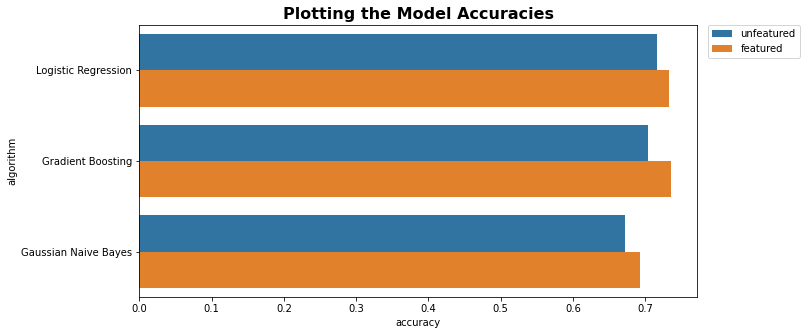

In [62]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'accuracy', y ='algorithm', hue='awikwok', data=dfp.melt(id_vars="algorithm", value_name='accuracy', var_name='awikwok'))
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")